In [1]:
import casacore.tables as pt

import dp3
import numpy as np
import astropy.time as ast
import scipy
from scipy.io import loadmat
import lofarantpos.db
import matplotlib.pyplot as plt
import sys
import os

In [2]:
print(os.getcwd())

/home/vpgautam/Documents


In [3]:
#1
ms_name = 'tbb_datax1.ms'
ms_desc = pt.required_ms_desc()
ms_desc["DATA"] = pt.makearrcoldesc(
    "DATA", 0.0, valuetype="complex", ndim=2, shape=[1, 1]
)["desc"]
for colname in (
    "ANTENNA1",
    "ARRAY_ID",
    "DATA_DESC_ID",
    "EXPOSURE",
    "FEED1",
    "FEED2",
    "FIELD_ID",
    "FLAG_CATEGORY",
    "FLAG_ROW",
    "INTERVAL",
    "OBSERVATION_ID",
    "PROCESSOR_ID",
    "SCAN_NUMBER",
    "SIGMA",
    "STATE_ID",
    "TIME",
    "TIME_CENTROID",
):
    ms_desc[colname]["dataManagerType"] = "IncrementalStMan"
    ms_desc[colname]["dataManagerGroup"] = "IncrementalStMan"

In [4]:
!rm -rf ms_name
ms = pt.default_ms(ms_name, tabdesc=ms_desc)

ms.close()


In [5]:
print(pt.taql("SHOW table tbb_datax1.ms")[0])


Structure of table /home/vpgautam/Documents/tbb_datax1.ms
------------------ Measurement Set
0 rows, 22 columns in little endian format (using 2 data managers)

  UVW            double   shape=[3] unit=[m,m,m] measure=uvw,ITRF directly stored
  FLAG           Bool     ndim=2
  FLAG_CATEGORY  Bool     ndim=3
  WEIGHT         float    ndim=1
  SIGMA          float    ndim=1
  ANTENNA1       Int      scalar
  ANTENNA2       Int      scalar
  ARRAY_ID       Int      scalar
  DATA_DESC_ID   Int      scalar
  EXPOSURE       double   scalar unit=[s]
  FEED1          Int      scalar
  FEED2          Int      scalar
  FIELD_ID       Int      scalar
  FLAG_ROW       Bool     scalar
  INTERVAL       double   scalar unit=[s]
  OBSERVATION_ID Int      scalar
  PROCESSOR_ID   Int      scalar
  SCAN_NUMBER    Int      scalar
  STATE_ID       Int      scalar
  TIME           double   scalar unit=[s] measure=epoch,UTC
  TIME_CENTROID  double   scalar unit=[s] measure=epoch,UTC
  DATA           Complex

In [6]:
os.chdir('/home/vpgautam/Documents/tbb_datax1.ms')

In [13]:
antid = pt.makescacoldesc("ANTENNA_ID", 1 )# antenna ID in antenna table

field_name = pt.makescacoldesc("NAME", "aa") # antenna field name 

antpos = pt.makearrcoldesc("POSITION", value=1., options=1,ndim=1, shape=[3]) 

coordinate_axes = pt.makearrcoldesc("COORDINATE_AXES",value=1., ndim=2, options=1, shape=[3,3])
elt_offset = pt.makearrcoldesc("ELEMENT_OFFSET", value=1.2, ndim=2, options=1, shape=[48,3])
elt_rcu = pt.makearrcoldesc("ELEMENT_RCU", value=1, ndim=2, options=1, shape=[48,2])
elt_flag = pt.makearrcoldesc("ELEMENT_FLAG", value=True, ndim=2, options=1, shape=[48,2])
tile_rot = pt.makescacoldesc("TILE_ROTATION", 1.)
tile_elt_off = pt.makescacoldesc("TILE_ELEMENT_OFFSET", 1.0)

In [14]:
td = pt.maketabdesc([antid, field_name, antpos, coordinate_axes, elt_offset, elt_rcu, elt_flag, tile_rot, tile_elt_off])

In [15]:
#sub=table(subtablefile, td, ack=False)
#t.putkeyword(subtablename, sub, makesubrecord=True)
#t=table(msfile, readonly=False, ack=False)

sub = pt.table("LOFAR_ANTENNA_FIELD", td)

Successful creation of default-locked table LOFAR_ANTENNA_FIELD: 9 columns, 0 rows


In [16]:
os.chdir('/home/vpgautam/Documents')

In [17]:
t = pt.table("tbb_datax1.ms", readonly=False, ack=False)

In [18]:
t.putkeyword("LOFAR_ANTENNA_FIELD", sub, makesubrecord=True)

In [19]:
t.close()

In [20]:
print(pt.taql("SHOW table tbb_datax1.ms")[0])


Structure of table /home/vpgautam/Documents/tbb_datax1.ms
------------------ Measurement Set
0 rows, 22 columns in little endian format (using 2 data managers)

  UVW            double   shape=[3] unit=[m,m,m] measure=uvw,ITRF directly stored
  FLAG           Bool     ndim=2
  FLAG_CATEGORY  Bool     ndim=3
  WEIGHT         float    ndim=1
  SIGMA          float    ndim=1
  ANTENNA1       Int      scalar
  ANTENNA2       Int      scalar
  ARRAY_ID       Int      scalar
  DATA_DESC_ID   Int      scalar
  EXPOSURE       double   scalar unit=[s]
  FEED1          Int      scalar
  FEED2          Int      scalar
  FIELD_ID       Int      scalar
  FLAG_ROW       Bool     scalar
  INTERVAL       double   scalar unit=[s]
  OBSERVATION_ID Int      scalar
  PROCESSOR_ID   Int      scalar
  SCAN_NUMBER    Int      scalar
  STATE_ID       Int      scalar
  TIME           double   scalar unit=[s] measure=epoch,UTC
  TIME_CENTROID  double   scalar unit=[s] measure=epoch,UTC
  DATA           Complex

In [21]:
#pt.taql("insert into new.MS::ANTENNA SET NAME='CS0021'")
pt.taql(
    "insert into tbb_datax1.ms::FIELD set NAME='pointing', PHASE_DIR=[[0,0,0]], DELAY_DIR=[[0,0,0]], REFERENCE_DIR=[[0,0,0]]"
)
####pt.taql("insert into new.MS set ANTENNA1=0, ANTENNA2=0, DATA=0, INTERVAL=1.0")
pt.taql("INSERT INTO tbb_datax1.ms::OBSERVATION SET TELESCOPE_NAME='LOFAR'")
pt.taql(
    "INSERT INTO tbb_datax1.ms::SPECTRAL_WINDOW SET CHAN_FREQ=[67.8]MHz,"
    + "CHAN_WIDTH=[0.195]MHz, "
    + "RESOLUTION=[0.195]MHz, "
    + "EFFECTIVE_BW=[0.195]MHz, NUM_CHAN=1, REF_FREQUENCY=67.8MHz, "
    + "TOTAL_BANDWIDTH = 0.195MHz"
)
pt.taql(
    "INSERT INTO tbb_datax1.ms::POLARIZATION SET CORR_TYPE=[9], CORR_PRODUCT=[[0,0]], NUM_CORR=1"##CORR_TYPE=[9,10,11,13]
)##CORR_PRODUCT =[[0,0],[0,1],[1,0],[1,1]], NUM_CORR =4
pt.taql(
    "INSERT INTO tbb_datax1.ms::DATA_DESCRIPTION SET POLARIZATION_ID=0, SPECTRAL_WINDOW_ID=0"
);


In [36]:
#pt.taql("SELECT * FROM mon_test.ms::OBSERVATION")
import astropy.time as ast

# Create an astropy time object for the given datetime string
start_time = ast.Time("2022-03-23T21:12:34.762")
end_time = ast.Time("2022-03-23T21:12:35.762")
# Convert to MJD in seconds since the reference epoch
start_mjdseconds = start_time.mjd * 86400.0
end_mjdseconds = end_time.mjd * 86400.0
print("START TIME MJD in seconds: ", start_mjdseconds)
print("END TIME MJD in seconds: ", end_mjdseconds)

time_range = np.array((start_mjdseconds, end_mjdseconds))
time_range = time_range.reshape(1,2)
print(time_range)

START TIME MJD in seconds:  5154786754.762
END TIME MJD in seconds:  5154786755.762
[[5.15478675e+09 5.15478676e+09]]


In [23]:

t = pt.table(ms_name+'/OBSERVATION', readonly=False)
t.putcol("TIME_RANGE", time_range)
t.putcol("SCHEDULE_TYPE", "AARTFAAC")
t.putcol("TELESCOPE_NAME", "LOFAR")
#t.putcol("AARTFAAC_FLAG_WINDOW_SIZE",1)
#t.putcol("AARTFAAC_ANTENNA_TYPE","LBA")
#t.putcol("AARTFAAC_RCU_MODE",1)

t.close()


Successful read/write open of default-locked table tbb_datax1.ms/OBSERVATION: 9 columns, 1 rows


(288, 3)


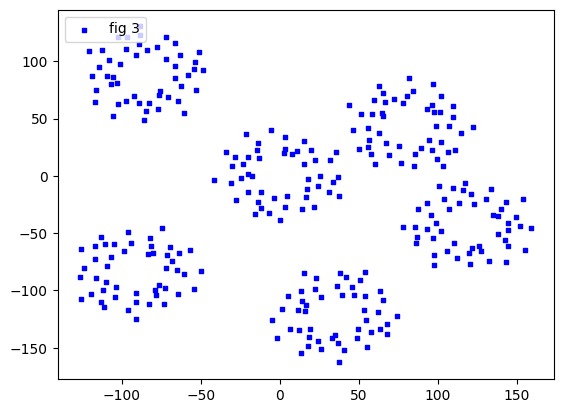

In [24]:
db = lofarantpos.db.LofarAntennaDatabase()

statname = ['CS002LBA', 'CS003LBA', 'CS004LBA', 'CS005LBA', 'CS006LBA', 'CS007LBA'];

Nstat=len(statname)
Nant=48
stref = []
for st in statname:
    strefi= db.phase_centres[st]
    stref.append(strefi)
    

stref= np.array(stref)
#print(stref)
#print(Nstat)
#print(Nant)
#db.antenna_pqr('RS210LBA')[:5]

(r, c) =stref.shape

abs_antpos=np.zeros((48*6,3))

for i in range(r):
    antposi= db.antenna_etrs(statname[i])[48:]
    #print(antpos)
  #  abs_antposi= antpos + stref[i]
    abs_antpos[48*i:48*(i+1),:]= antposi
    
statref_CS002= stref[0,:]
#print(statref_CS002)
statref_CS002rep = np.tile(statref_CS002, (48*6,1))
#print(statref_CS002rep)
#same variable as in matlab function ADS_superter_analysis.m 
rotmat = loadmat('rotmat.mat')
rotmat = np.array(rotmat['rotmat'])
#print(rotmat)
x = np.matmul(np.linalg.pinv(np.transpose(rotmat)),np.transpose(abs_antpos - statref_CS002rep))
x= np.transpose(x)
posITRF = np.array(x)
print(posITRF.shape)

antpos_etrs= np.array(abs_antpos)
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x[:,0], x[:,1], s=10, c='b', marker="s", label='fig 3')
plt.legend(loc='upper left');
plt.show()


In [25]:
t = pt.table(ms_name+'/ANTENNA', readonly=False)
t.addrows(288)
t.putcol("POSITION", antpos_etrs)

t.close()

Successful read/write open of default-locked table tbb_datax1.ms/ANTENNA: 8 columns, 0 rows


In [26]:
pt.taql("SELECT * FROM tbb_datax1.ms/ANTENNA")

In [27]:
superterp_data = loadmat('superterp_data.mat')
covmat= superterp_data["covmat"]
print(covmat.shape)
print(covmat.dtype)
nr_ant = covmat.shape[0]
(ant1_idx, ant2_idx)= np.triu_indices(nr_ant)
uvw= antpos_etrs[ant1_idx,:] - antpos_etrs[ant2_idx,:]
print(uvw.shape)
nr_bl= nr_ant * (nr_ant+1)//2


#flag_col = np.ndarray([[[False], [False], [False], [False]]])
#print(flag_col.shape)
flag1=np.repeat([[[False]]], 4, axis=1)
#flag_col = np.repeat(flag1, 2, axis=0)


(288, 288)
complex128
(41616, 3)


In [28]:
t = pt.table(ms_name, readonly=False)

t.addrows(nr_bl)

covmat[np.triu_indices(nr_ant)].astype(np.complex64).reshape((nr_bl, 1, 1)).shape

t.putcol("DATA", covmat[np.triu_indices(nr_ant) ].reshape((nr_bl, 1, 1)), startrow=0, nrow=nr_bl)
t.putcol("TIME", np.repeat(5154786754.762, nr_bl,axis=0), startrow=0, nrow=nr_bl)
t.putcol("TIME_CENTROID", np.repeat(5154786754.762,nr_bl,axis=0), startrow=0, nrow=nr_bl)
t.putcol("EXPOSURE", np.repeat(1,nr_bl,axis=0), startrow=0, nrow=nr_bl)
t.putcol("INTERVAL", np.repeat(1, nr_bl, axis=0), startrow=0, nrow=nr_bl)
t.putcol("FLAG",np.repeat([[[False]]], nr_bl,axis=0), startrow=0, nrow=nr_bl)
t.putcol("WEIGHT", np.repeat([[1]], nr_bl, axis=0), startrow=0, nrow=nr_bl)
t.putcol("SIGMA", np.repeat([[1]],nr_bl,axis=0), startrow=0, nrow=nr_bl)
t.putcol("ANTENNA1", ant1_idx, startrow=0, nrow=nr_bl)
t.putcol("ANTENNA2", ant2_idx, startrow=0, nrow=nr_bl)
t.putcol("UVW", uvw, startrow=0, nrow=nr_bl)
t.close()

Successful read/write open of default-locked table tbb_datax1.ms: 22 columns, 0 rows


In [29]:
pt.taql("SELECT * FROM tbb_datax1.ms LIMIT 10")

In [30]:
parset = dp3.parameterset.ParameterSet()

parset.add("msin", "tbb_datax1.ms")
parset.add("msout", "tbb_datax1.ms")
parset.add("steps", "[]")
parset.add("out.overwrite", "True")

In [31]:
first_step = dp3.make_main_steps(parset)

In [32]:
first_step.set_info(dp3.DPInfo())
first_step.process(dp3.DPBuffer())

True

In [3]:
pt.taql("UPDATE tbb_datax1.ms::ANTENNA SET MOUNT='ALT-AZ'")
pt.taql("UPDATE tbb_datax1.ms::ANTENNA SET NAME='CS00' + str(rownr()) +'LBA'")

In [3]:
print(pt.taql("SHOW table tbb_datax1.ms")[0])


Structure of table /home/vpgautam/Documents/tbb_datax1.ms
------------------ Measurement Set
41616 rows, 22 columns in little endian format (using 2 data managers)

  UVW            double   shape=[3] unit=[m,m,m] measure=uvw,ITRF directly stored
  FLAG           Bool     ndim=2
  FLAG_CATEGORY  Bool     ndim=3
  WEIGHT         float    ndim=1
  SIGMA          float    ndim=1
  ANTENNA1       Int      scalar
  ANTENNA2       Int      scalar
  ARRAY_ID       Int      scalar
  DATA_DESC_ID   Int      scalar
  EXPOSURE       double   scalar unit=[s]
  FEED1          Int      scalar
  FEED2          Int      scalar
  FIELD_ID       Int      scalar
  FLAG_ROW       Bool     scalar
  INTERVAL       double   scalar unit=[s]
  OBSERVATION_ID Int      scalar
  PROCESSOR_ID   Int      scalar
  SCAN_NUMBER    Int      scalar
  STATE_ID       Int      scalar
  TIME           double   scalar unit=[s] measure=epoch,UTC
  TIME_CENTROID  double   scalar unit=[s] measure=epoch,UTC
  DATA           Com

In [49]:
print(pt.taql("SHOW table a12-SB212-1sec-reference.ms")[0])


Structure of table /home/vpgautam/Documents/a12-SB212-1sec-reference.ms
------------------ Measurement Set
166176 rows, 25 columns in little endian format (using 4 data managers)

  UVW             double   shape=[3] unit=[m,m,m] measure=uvw,ITRF directly stored
  FLAG            Bool     shape=[8,4] directly stored
  FLAG_CATEGORY   Bool     shape=[0,0,0]
  WEIGHT          float    shape=[4] directly stored
  SIGMA           float    shape=[4] directly stored
  ANTENNA1        Int      scalar
  ANTENNA2        Int      scalar
  ARRAY_ID        Int      scalar
  DATA_DESC_ID    Int      scalar
  EXPOSURE        double   scalar unit=[s]
  FEED1           Int      scalar
  FEED2           Int      scalar
  FIELD_ID        Int      scalar
  FLAG_ROW        Bool     scalar
  INTERVAL        double   scalar unit=[s]
  OBSERVATION_ID  Int      scalar
  PROCESSOR_ID    Int      scalar
  SCAN_NUMBER     Int      scalar
  STATE_ID        Int      scalar
  TIME            double   scalar unit=[

In [63]:
pt.taql("SELECT * FROM a12-SB212-1sec-reference.ms")

In [2]:
pt.taql("SELECT * FROM tbb_datax1.ms/OBSERVATION")

In [18]:
pt.taql("UPDATE tbb_datax1.ms::OBSERVATION SET TELESCOPE_NAME= 'LOFAR'")

In [4]:
print(pt.taql("SHOW table tbb_datax1.ms")[0])


Structure of table /home/vpgautam/Documents/tbb_datax1.ms
------------------ Measurement Set
41616 rows, 22 columns in little endian format (using 2 data managers)

  UVW            double   shape=[3] unit=[m,m,m] measure=uvw,ITRF directly stored
  FLAG           Bool     ndim=2
  FLAG_CATEGORY  Bool     ndim=3
  WEIGHT         float    ndim=1
  SIGMA          float    ndim=1
  ANTENNA1       Int      scalar
  ANTENNA2       Int      scalar
  ARRAY_ID       Int      scalar
  DATA_DESC_ID   Int      scalar
  EXPOSURE       double   scalar unit=[s]
  FEED1          Int      scalar
  FEED2          Int      scalar
  FIELD_ID       Int      scalar
  FLAG_ROW       Bool     scalar
  INTERVAL       double   scalar unit=[s]
  OBSERVATION_ID Int      scalar
  PROCESSOR_ID   Int      scalar
  SCAN_NUMBER    Int      scalar
  STATE_ID       Int      scalar
  TIME           double   scalar unit=[s] measure=epoch,UTC
  TIME_CENTROID  double   scalar unit=[s] measure=epoch,UTC
  DATA           Com

In [13]:
pt.taql("SELECT * FROM tbb_datax1.ms/DATA_DESCRIPTION/")

In [15]:
pt.taql("SELECT * FROM a12-SB212-1sec-reference.ms/DATA_DESCRIPTION/")

In [16]:
pt.taql("SELECT * FROM tbb_datax1.ms/FEED/")

In [17]:
pt.taql("SELECT * FROM tbb_datax1.ms/FIELD/")

In [ ]:
pt.taql("SELECT * FROM tbb_datax1.ms/")

In [7]:
pt.taql("SELECT * FROM tbb_datax1.ms/FLAG_CMD/")

In [9]:
pt.taql("SELECT * FROM tbb_datax1.ms/LOFAR_ANTENNA_FIELD/")

In [10]:
pt.taql("SELECT * FROM tbb_datax1.ms/POINTING/")

In [11]:
pt.taql("SELECT * FROM tbb_datax1.ms/POLARIZATION/")

In [20]:
pt.taql("SELECT * FROM tbb_datax1.ms/OBSERVATION")

In [19]:
pt.taql("SELECT * FROM a12-SB212-1sec-reference.ms/OBSERVATION/")

In [21]:
t = pt.table("tbb_datax1.ms/OBSERVATION", readonly=False, ack=False)

In [23]:
tc=t.col("FLAG_ROW")

In [25]:
print(tc[0])

False


In [28]:
t.getcolkeywords("TELESCOPE_NAME")

{}

In [29]:
flg_win_size=pt.makescacoldesc("AARTFAAC_FLAG_WINDOW_SIZE", 1)
ant_type= pt.makescacoldesc("AARTFAAC_ANTENNA_TYPE", "aa")
rcu_mode = pt.makescacoldesc("AARTFAAC_RCU_MODE", 1)
t.addcols(pt.maketabdesc([flg_win_size, ant_type, rcu_mode]))

In [30]:
t.close()

In [31]:
pt.taql("SELECT * FROM tbb_datax1.ms/OBSERVATION/")

In [32]:
pt.taql("UPDATE tbb_datax1.ms::OBSERVATION SET AARTFAAC_FLAG_WINDOW_SIZE=1, AARTFAAC_ANTENNA_TYPE='LBA', AARTFAAC_RCU_MODE=1")

In [33]:
pt.taql("UPDATE tbb_datax1.ms::OBSERVATION SET TELESCOPE_NAME= 'AARTFAAC'")

In [34]:
pt.taql("SELECT * FROM a12-SB212-1sec-reference.ms/FIELD")

In [35]:
pt.taql("SELECT * FROM tbb_datax1.ms/FIELD")

In [40]:
pt.taql("UPDATE tbb_datax1.ms::FIELD SET NAME= 'AARTFAAC', SOURCE_ID = -1, TIME=5154786754.762")

In [42]:
pt.taql("SELECT * FROM a12-SB212-1sec-reference.ms/ANTENNA")

In [43]:
pt.taql("SELECT * FROM tbb_datax1.ms/ANTENNA")

In [44]:
pt.taql("UPDATE tbb_datax1.ms::ANTENNA SET STATION = 'AARTFAAC'")

In [47]:
pt.taql("SELECT * FROM a12-SB212-1sec-reference.ms/HISTORY")

In [48]:
pt.taql("SELECT * FROM tbb_datax1.ms/HISTORY")